## Práctica 7: Algoritmos de grafos. Parte 2

**Objetivos:** Conocer e identificar las características necesarias para entender el algoritmo de búsqueda por profundidad en un grafo.

**Actividades:** Implementar la búsqueda por profundidad en un grafo representado por una lista de adyacencia en lenguaje Python.

**Instrucciones:**
- Implementar en lenguaje Python el algoritmo de búsqueda por profundidad dentro de un grafo. El grafo puede ser dirigido y no dirigido, puede tener o no costo.
- Obtener el polinomio y la complejidad algorítmica del algoritmo búsqueda por profundidad para el mejor, el peor y el caso promedio.
- Crear las gráficas de la complejidad que tiene el algoritmo de búsqueda por profundidad dentro de un grafo para el mejor caso, el peor caso y el caso promedio.


In [1]:
import matplotlib.pyplot as plt
import random

C R E A C I Ó N _ D E L _ N O D O

In [2]:
class Node:
    to = 0 # Nodo al que se conecta
    cost = 0 # Costo
    nxt = None # Nodo siguiente
    
    #BFS 
    prev = None # Nodo anterior
    # color: 0 - blanco, 1 - gris,  2 - negro
    color = 0
    distance = -1
    final = -1

C R E A C I Ó N _ D E L _ G R A F O

In [3]:
class Graph:    
    time = 0
    def __init__ (self, numNodes, numEdges, directed, cost):
        self.edges = [] # Aristas
        self.grade = [] # Grado del nodo, número de aristas que salen
        self.numNodes = numNodes
        self.numEdges = numEdges
        # Si el grafo es dirigido / con costo será 1, sino 0
        self.directed = True if directed == 1 else False
        self.hasCost = True if cost == 1 else False
        
        # Contadores
        self.timeV_MEJOR = 0
        self.timeA_MEJOR = 0
        self.timeV_PEOR = 0
        self.timeA_PEOR = 0
        self.timeV_PROM = 0
        self.timeA_PROM = 0
        self.time_PROM_TOTAL = 0
        self.time_PEOR_TOTAL = 0


        i = 0
        while i <= self.numNodes:
            self.grade.append(0) # El nodo no tiene conexiones
            self.edges.append(None) # Sin conexiones definidas
            i += 1
            
# ======================================================================================

    # I N S E R C I Ó N _ A R I S T A
    
    def insert_edge(self, intU, intV, intCost, isDirected):
    # Inserta una arista de U (origen) a V (destino)
        item = Node()
        item.cost = intCost
        item.to = intV # Apunta al nodo de destino
        item.nxt = self.edges[intU] # Encadena la arista, construye una lista enlazada
        
        self.edges[intU] = item # Se convierte en la cabeza de aristas que salen de U
        self.grade[intU] += 1 # Una nueva arista, se incrementa el grado
        
        # Verifica la arista no es dirigida y si no es un lazo 
        if isDirected == False and intV != intU:
            # Se agrega una arista de V a U
            self.insert_edge(intV, intU, intCost, True)
            
# ======================================================================================

    # L E C T U R A _ A R I S T A
    def read_edges(self):
        i = 1
        # Solicita al usuario las aristas
        while i <= self.numEdges:
            u = random.randint(1, self.numNodes)
            v = random.randint(1, self.numNodes)
            
            if self.hasCost == True:
                cost = random.randint(1, 10)
            else: 
                cost = 1 # Costo por defecto
                
            self.insert_edge(u, v, cost, self.directed) # Inserta en el grafo
            i += 1
            
    # ======================================================================================

    # I M P R E S I Ó N
    
    def printUwU(self):
        i = 1
        item = None
        string = "" # Acumula la representación del grafo
        
        while i <= self.numNodes: # Itera sobre los nodos
            string += str(i) + "\t" # Agrega el número del nodo 
            item = self.edges[i] # Se inicializa con la cabeza de la lista enlazada
            
            while item != None: # Itera sobre las aristas
                # Añade el nodo de destino y el costo
                string += str(item.to) + ": " + str(item.cost) + "\t" 
                # Avanza al siguiente nodo
                item = item.nxt
                
            string += "\n"
            i += 1 
            
            print(string)
        
# ======================================================================================

    # D E P T H _ F I R S T _ S E A R C H  _ V I S I T
    
    def DFS_visit(self, u):
        self.edges[u].color = 1
        self.time += 1
        self.edges[u].distance = self.time
        
        v = self.edges[u]
        while v != None:
            self.timeA_MEJOR += 1
            self.timeA_PEOR += 1
            self.timeA_PROM += 1
            
            self.time_PROM_TOTAL += 1
            self.time_PEOR_TOTAL += 1
            
            if self.edges[v.to] != None:
                if self.edges[v.to].color == 0:
                    self.edges[v.to].prev = self.edges[u]
                    self.DFS_visit(v.to)
            v = v.nxt
        
        self.edges[u].color = 2
        self.time += 1
        self.edges[u].final = self.time    
        
    
# ======================================================================================

    # D E P T H _ F I R S T _ S E A R C H 
    
    def depth_first_search(self):
        i = 1
        while i <=  self.numNodes:
            self.timeV_MEJOR += 1
            self.timeV_PEOR += 1
            self.timeV_PROM += 1

            self.time_PROM_TOTAL += 1
            self.time_PEOR_TOTAL += 1
            
            if self.edges[i] != None:
                if self.edges[i].color == 0:
                    self.DFS_visit(i)
            i += 1
# ======================================================================================


    # I M P R E S I Ó N _ C O L O R 
    
    def print_color(self): 
        i = 1
        print("\n DEPTH FIRST SEARCH: ")
        string = "" # Acumula info
        while i <= self.numNodes: # Recorre los nodos
            if self.edges[i] != None: # Verifica si existe
                # Asignación de colores
                if self.edges[i].color == 0:
                    color = "blanco"
                elif self.edges[i].color == 1:
                    color = "gris"
                else:
                    color = "Negro"
                    
                # cadena de salida
                string += str(i) + ": " + color + " - " + str(self.edges[i].distance) + " - " + str(self.edges[i].final) + "\t"
                string += "\n"
            
            i += 1
        print(string)

In [4]:
def main():
    # Solicita la información 
    nodes = int(input("Vertex number?")) # Núm nodos
    edges = int(input("Edges number?")) # Núm vertices
    isDirected = int(input("It is directed? 1) YES, 2) NO: ")) # Dirección
    hasCost = int(input("Edge's cost? 1) YES, 2) NO: ")) # Costo
    
    objGraph = Graph(nodes, edges, isDirected, hasCost)
    objGraph.read_edges()
    objGraph.printUwU()
    objGraph.depth_first_search()
    objGraph.print_color()

main()

1	6: 2	

1	6: 2	
2	

1	6: 2	
2	
3	3: 8	

1	6: 2	
2	
3	3: 8	
4	9: 5	6: 4	

1	6: 2	
2	
3	3: 8	
4	9: 5	6: 4	
5	2: 10	

1	6: 2	
2	
3	3: 8	
4	9: 5	6: 4	
5	2: 10	
6	2: 2	3: 3	4: 9	

1	6: 2	
2	
3	3: 8	
4	9: 5	6: 4	
5	2: 10	
6	2: 2	3: 3	4: 9	
7	

1	6: 2	
2	
3	3: 8	
4	9: 5	6: 4	
5	2: 10	
6	2: 2	3: 3	4: 9	
7	
8	2: 4	

1	6: 2	
2	
3	3: 8	
4	9: 5	6: 4	
5	2: 10	
6	2: 2	3: 3	4: 9	
7	
8	2: 4	
9	

1	6: 2	
2	
3	3: 8	
4	9: 5	6: 4	
5	2: 10	
6	2: 2	3: 3	4: 9	
7	
8	2: 4	
9	
10	3: 9	


 DEPTH FIRST SEARCH: 
1: Negro - 1 - 8	
3: Negro - 3 - 4	
4: Negro - 5 - 6	
5: Negro - 9 - 10	
6: Negro - 2 - 7	
8: Negro - 11 - 12	
10: Negro - 13 - 14	



####  *A N Á L I S I S _ D E _ C O M P L E J I D A D*

***Análisis Peor Caso:*** Todas las conexiones entre cada nodo

    def depth_first_search(self):                                   
        i = 1                                                       # 3
        while i <=  self.numNodes:                                  # 5 * ( V + 1 )
            if self.edges[i] != None:                               # 5 * V
                if self.edges[i].color == 0:                        # 6 * V
                    self.DFS_visit(i)                               # 4 * V + (37A + 47)
            i += 1                                                  # 5
                                                                    # O( V + A ) = 20V + 37A + 54

    def DFS_visit(self, u):
        self.edges[u].color = 1                                     # 6
        self.time += 1                                              # 5
        self.edges[u].distance = self.time                          # 7
        
        v = self.edges[u]                                           # 5
        while v != None:                                            # 4 * ( A + 1 )
            if self.edges[v.to] != None:                            # 7 * A
                if self.edges[v.to].color == 0:                     # 8 * A
                    self.edges[v.to].prev = self.edges[u]           # 9 * A
                    self.DFS_visit(v.to)                            # 4 * A
            v = v.nxt                                               # 5 * A
        
        self.edges[u].color = 2                                     # 6
        self.time += 1                                              # 7
        self.edges[u].final = self.time                             # 7
                                                                    # O( A ) = 37A + 47 

***Análisis Mejor Caso:*** Nodo aislado

    def depth_first_search(self):                                   
        i = 1                                                       # 3
        while i <=  self.numNodes:                                  # 5 * ( 1 + 1 )
            if self.edges[i] != None:                               # 5 * 1
                if self.edges[i].color == 0:                        # 6 * 1
                    self.DFS_visit(i)                               # 4 * 1 + ( 47 )
            i += 1                                                  # 5
                                                                    # O( 1 + 0 ) = 80

    def DFS_visit(self, u):
        self.edges[u].color = 1                                     # 6
        self.time += 1                                              # 5
        self.edges[u].distance = self.time                          # 7
        
        v = self.edges[u]                                           # 5
        while v != None:                                            # 4 * ( 0 + 1 )
            if self.edges[v.to] != None:                            # 7 * 0
                if self.edges[v.to].color == 0:                     # 8 * 0
                    self.edges[v.to].prev = self.edges[u]           # 9 * 0
                    self.DFS_visit(v.to)                            # 4 * 0
            v = v.nxt                                               # 5 * 0
        
        self.edges[u].color = 2                                     # 6
        self.time += 1                                              # 7
        self.edges[u].final = self.time                             # 7
                                                                    # O( A ) = 47
        

***Análisis Caso Promedio:*** Conexiones random entre cada nodo

    def depth_first_search(self):                                   
        i = 1                                                       # 3
        while i <=  self.numNodes:                                  # 5 * ( V + 1 )
            if self.edges[i] != None:                               # 5 * V
                if self.edges[i].color == 0:                        # 6 * V
                    self.DFS_visit(i)                               # 4 * V + (37A + 47)
            i += 1                                                  # 5
                                                                    # O( V + A ) = 20V + 37A + 54

    def DFS_visit(self, u):
        self.edges[u].color = 1                                     # 6
        self.time += 1                                              # 5
        self.edges[u].distance = self.time                          # 7
        
        v = self.edges[u]                                           # 5
        while v != None:                                            # 4 * ( A + 1 )
            if self.edges[v.to] != None:                            # 7 * A
                if self.edges[v.to].color == 0:                     # 8 * A
                    self.edges[v.to].prev = self.edges[u]           # 9 * A
                    self.DFS_visit(v.to)                            # 4 * A
            v = v.nxt                                               # 5 * A
        
        self.edges[u].color = 2                                     # 6
        self.time += 1                                              # 7
        self.edges[u].final = self.time                             # 7
                                                                    # O( A ) = 37A + 47 

# *M E J O R _ C A S O*
- Cuando hay un solo nodo

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


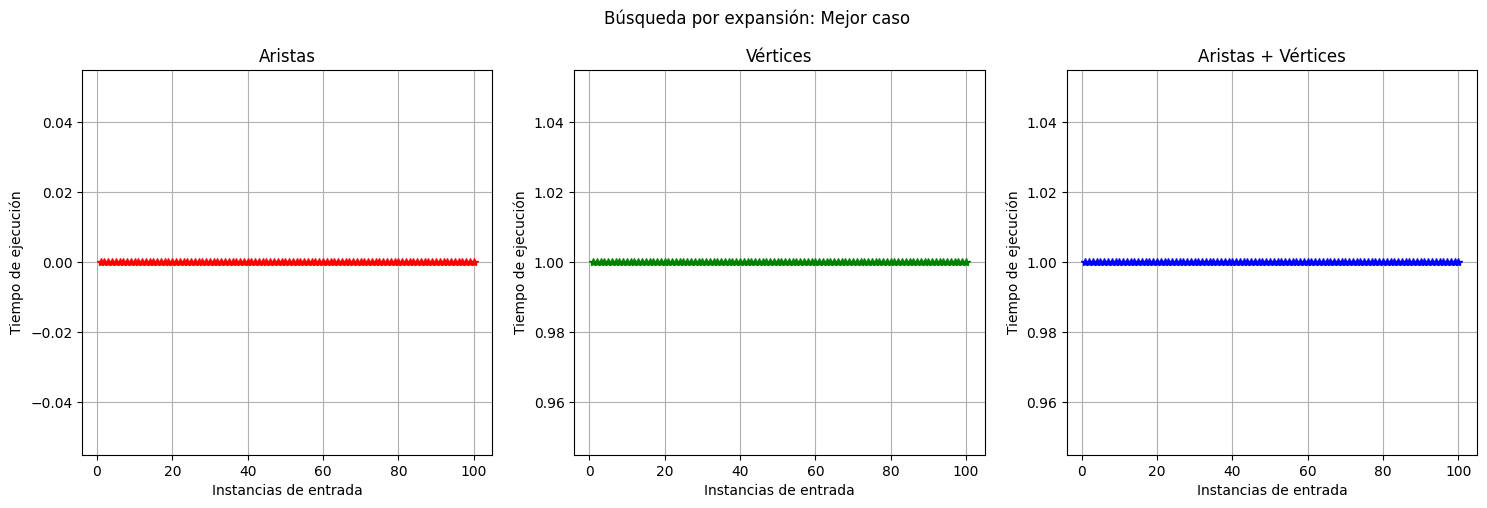

In [5]:
def mejorCaso():
    TAM = 100

    MejorTimeA = []
    MejorTimeV = []
    MejortimeTotal = []

    x = [i for i in range(1, TAM + 1)]
    
    i = 0
    while i < len(x):
        node = 1
        edges = 0
        isDirected = 2
        hasCost = 2
        

        mejorCaso = Graph(node, edges, isDirected, hasCost)
        mejorCaso.read_edges()
        mejorCaso.depth_first_search()

        MejorTimeA.append(mejorCaso.timeA_MEJOR)
        MejorTimeV.append(mejorCaso.timeV_MEJOR)
        MejortimeTotal.append(mejorCaso.timeV_MEJOR + mejorCaso.timeA_MEJOR)

        i += 1 

    print(MejorTimeV)
    print(MejorTimeA)
    print(x)

    fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(18,5))

    ax1 = axs[0]
    ax2 = axs[1]
    ax3 = axs[2]

    ax1.plot(x, MejorTimeA, "r*")
    ax2.plot(x, MejorTimeV, "g*")
    ax3.plot(x, MejortimeTotal, "b*")

    fig.suptitle("Búsqueda por expansión: Mejor caso", y=1)
    ax1.set_title("Aristas")
    ax2.set_title("Vértices")
    ax3.set_title("Aristas + Vértices")

    ax1.set_xlabel("Instancias de entrada")
    ax1.set_ylabel("Tiempo de ejecución")

    ax2.set_xlabel("Instancias de entrada")
    ax2.set_ylabel("Tiempo de ejecución")

    ax3.set_xlabel("Instancias de entrada")
    ax3.set_ylabel("Tiempo de ejecución")

    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)

mejorCaso()


# *P E O R _ C A S O*
- Cuando existen todos los aristas posibles

[0, 1, 5, 12, 17, 27, 40, 52, 69, 85, 106, 127, 147, 175, 204, 232, 265, 297, 329, 366, 413, 450, 492, 537, 587, 638, 689, 729, 794, 857, 920, 979, 1043, 1098, 1172, 1245, 1317, 1385, 1459, 1537, 1615, 1697, 1789, 1878, 1958, 2052, 2135, 2222, 2331, 2421, 2522, 2623, 2743, 2839, 2941, 3044, 3172, 3273, 3398, 3505, 3630, 3754, 3876, 3995, 4123, 4253, 4389, 4516, 4660, 4803, 4935, 5077, 5223, 5368, 5515, 5659, 5829, 5971, 6128, 6269, 6441, 6594, 6768, 6924, 7096, 7267, 7443, 7615, 7789, 7967, 8140, 8324, 8507, 8694, 8889, 9073, 9264, 9449, 9657, 9851]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,

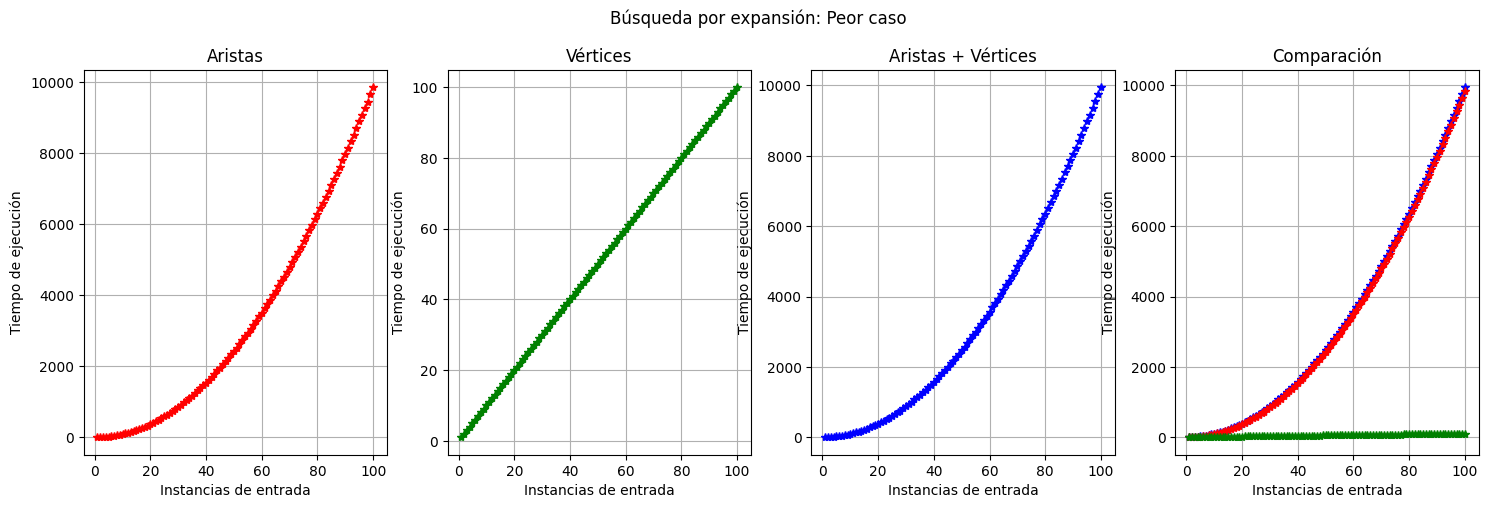

In [6]:
def peorCaso():
    TAM = 100
    
    # ================================================
    # P E O R  C A S O
    
    PeorTimeA = []
    PeorTimeV = []
    PeortimeTotal = [] 
    PeorTotal = []

    x = [i for i in range(1, TAM + 1)]
    i = 0
    
    while i < len(x):
        num = x[i]
        node = num
        isDirected = 0 
        hasCost = 1
        edges = (node * (node - 1)) // 2



        peorCaso = Graph(node, edges, isDirected, hasCost)
        peorCaso.read_edges()
        peorCaso.depth_first_search()
        
        PeorTimeA.append(peorCaso.timeA_PEOR)
        PeorTimeV.append(peorCaso.timeV_PEOR)
        PeortimeTotal.append(peorCaso.time_PEOR_TOTAL)
        PeorTotal.append(peorCaso.timeV_PEOR + peorCaso.timeA_PEOR)
        
        i += 1 
    
    print(PeorTimeA)
    print(PeorTimeV)
    print(x)
    
    fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(18,5))

    ax1 = axs[0]
    ax2 = axs[1]
    ax3 = axs[2]
    ax4 = axs[3]
    
    ax1.plot(x, PeorTimeA, "r*")
    ax2.plot(x, PeorTimeV, "g*")
    ax3.plot(x, PeortimeTotal, "b*") 
    ax4.plot(x, PeorTotal, "b*")
    ax4.plot(x, PeorTimeA, "r*")
    ax4.plot(x, PeorTimeV, "g*")
    
    fig.suptitle("Búsqueda por expansión: Peor caso", y = 1)
    ax1.set_title("Aristas")
    ax2.set_title("Vértices")
    ax3.set_title("Aristas + Vértices")
    ax4.set_title("Comparación")

    ax1.set_xlabel("Instancias de entrada")
    ax1.set_ylabel("Tiempo de ejecución")

    ax2.set_xlabel("Instancias de entrada")
    ax2.set_ylabel("Tiempo de ejecución")

    ax3.set_xlabel("Instancias de entrada")
    ax3.set_ylabel("Tiempo de ejecución")

    ax4.set_xlabel("Instancias de entrada")
    ax4.set_ylabel("Tiempo de ejecución")

    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)
    ax4.grid(True)
    
peorCaso()


# *C A S O _ P R O M E D I O*
- Cuando hay un número random aristas

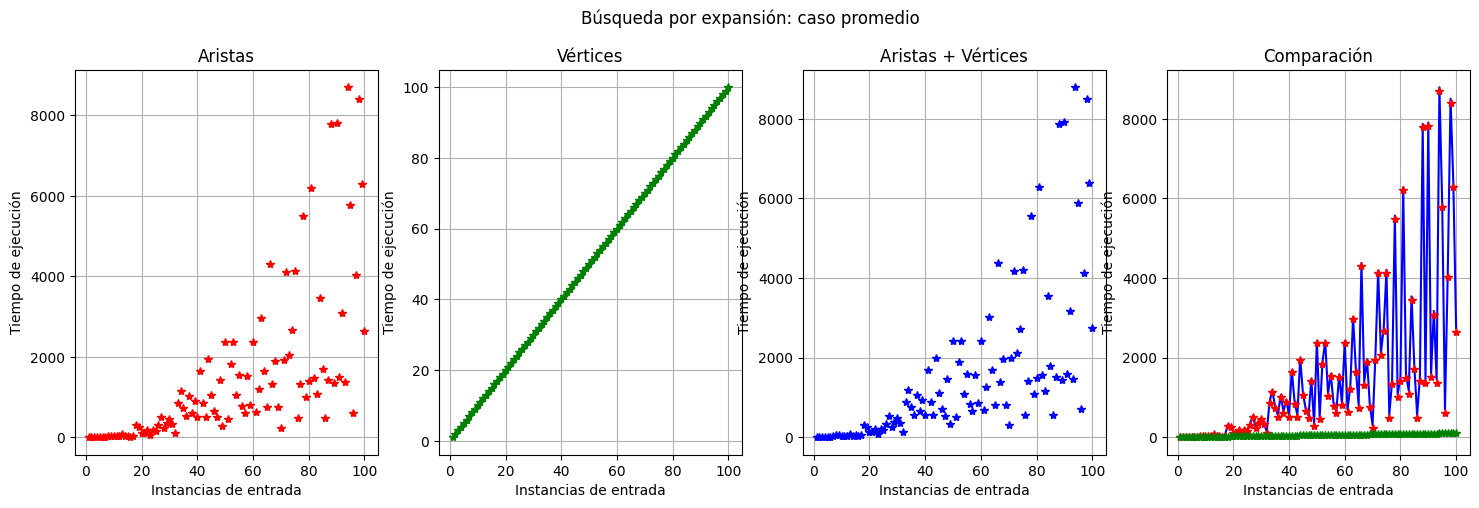

In [7]:
def casoPromedio():
    TAM = 100
    
    PromedioTimeA = []
    PromedioTimeV = []
    PromediotimeTotal = []
    PromedioTotal = []

    x = [i for i in range(1, TAM+1)]
    i = 0
    
    while i < len(x):
        num = x[i]
        node = num
        edges = node - 1
        isDirected = random.randint(1, 2)
        hasCost = 1
        
        if node > 1:
            edges += random.randint(1, (node * (node - 1)) // 2)
        else:
            edges = 0

        casoPromedio = Graph(node, edges, isDirected, hasCost)
        casoPromedio.read_edges()
        casoPromedio.depth_first_search()

        PromedioTimeA.append(casoPromedio.timeA_PROM)
        PromedioTimeV.append(casoPromedio.timeV_PROM)
        PromediotimeTotal.append(casoPromedio.time_PROM_TOTAL)
        PromedioTotal.append(casoPromedio.timeA_PROM + casoPromedio.timeV_PROM)

        i += 1 
    


    fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(18,5))

    ax1 = axs[0]
    ax2 = axs[1]
    ax3 = axs[2]
    ax4 = axs[3]

    ax1.plot(x, PromedioTimeA, "r*")
    ax2.plot(x, PromedioTimeV, "g*")
    ax3.plot(x, PromediotimeTotal, "b*") 
    ax4.plot(x, PromedioTotal, "b")
    ax4.plot(x, PromedioTimeA, "r*")
    ax4.plot(x, PromedioTimeV, "g*")
    

    fig.suptitle("Búsqueda por expansión: caso promedio", y = 1)
    ax1.set_title("Aristas")
    ax2.set_title("Vértices")
    ax3.set_title("Aristas + Vértices")
    ax4.set_title("Comparación")

    ax1.set_xlabel("Instancias de entrada")
    ax1.set_ylabel("Tiempo de ejecución")

    ax2.set_xlabel("Instancias de entrada")
    ax2.set_ylabel("Tiempo de ejecución")

    ax3.set_xlabel("Instancias de entrada")
    ax3.set_ylabel("Tiempo de ejecución")

    ax4.set_xlabel("Instancias de entrada")
    ax4.set_ylabel("Tiempo de ejecución")
    
    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)
    ax4.grid(True)

casoPromedio()